# About 
In this notebook the dataset is plotted before and after making cuts.  Start by loading standard imports.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import sys 

%matplotlib inline

### Import utilities
The utilities used in the source directory for `bsa.py` are imported here by adding that directory to the system path.

In [2]:
sys.path.append(os.path.abspath('../src/data'))
import bsa
import bsautils as utils

In [3]:
dir(utils)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'bin_by_quantile',
 'build_dataframe',
 'build_filter',
 'convert_bin_limits_to_centers',
 'get_asymmetry_df',
 'get_global_bin',
 'get_global_bin_data',
 'get_largest_shifts',
 'get_linearized_error',
 'get_random_config',
 'get_randomized_error',
 'get_results',
 'json',
 'load_config',
 'load_dataset',
 'logging',
 'np',
 'pd',
 'read_random_results',
 'reduce_mem_usage',
 'save_to_database']

In [4]:
print(sys.path)

['', '/usr/local/Cellar/root6/6.08.06_2/lib/root', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-old', '/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload', '/Users/davidriser/Library/Python/2.7/lib/python/site-packages', '/usr/local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/site-packages', '

In [5]:
config_file = '../config-laptop.json'
config = utils.load_config(config_file)

# This will ensure all data is loaded.
config['sample_size'] = 100000

# Raw dataset loading
data = utils.load_dataset(config)

# Filtered data 
nom_filter = utils.build_filter(data)
nom_data = utils.build_dataframe(data, nom_filter)

# Bins for axes 
bins = bsa.setup_binning(config, nom_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98492 entries, 0 to 99999
Data columns (total 30 columns):
Unnamed: 0       98492 non-null int64
helicity         98492 non-null int64
meson_id         98492 non-null int64
missing_mass     98492 non-null float64
x                98492 non-null float64
q2               98492 non-null float64
z                98492 non-null float64
pt               98492 non-null float64
w                98492 non-null float64
eta              98492 non-null float64
phi_h            98492 non-null float64
theta_h          98492 non-null float64
p_ele            98492 non-null float64
p_mes            98492 non-null float64
phi_ele          98492 non-null float64
phi_mes          98492 non-null float64
theta_ele        98492 non-null float64
theta_mes        98492 non-null float64
dvz              98492 non-null float64
alpha            98492 non-null float64
dist_ecsf        98492 non-null float64
dist_ec_edep     98492 non-null float64
dist_vz          

### Plotting Options 
Here some basic options and customizations are defined.  Using latex for the axes labels takes a long time, so that option should be false until the final plots are drawn.

In [6]:
plt.rc('font', family='serif')
plt.rc('font', size=20)
plt.rc('text', usetex=True)

basic_histo = {
    'alpha':0.6,
    'histtype':'step'
}

filled_histo = {
    'alpha':0.4,
    'edgecolor':'k'
}

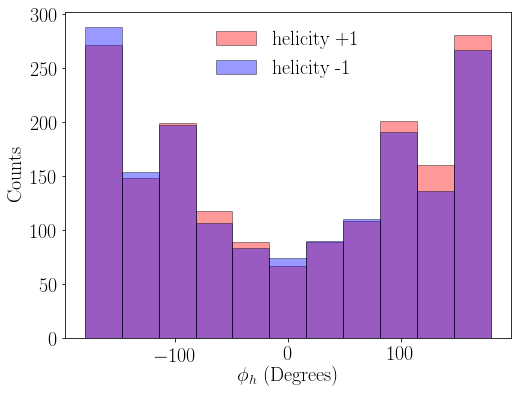

In [7]:
pos = np.where((nom_data['helicity'].values > 0) & (nom_data['x'].values > 0.12) & (nom_data['x'].values < 0.20))
neg = np.where((nom_data['helicity'].values < 0) & (nom_data['x'].values > 0.12) & (nom_data['x'].values < 0.20))

phi_bins = np.linspace(-180, 180, 12)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.hist(nom_data.iloc[pos]['phi_h'], color='red', bins=phi_bins, label='helicity +1', **filled_histo);
ax.hist(nom_data.iloc[neg]['phi_h'], color='blue', bins=phi_bins, label='helicity -1', **filled_histo);
ax.legend(frameon=False, loc='best')
ax.set_xlabel('$\phi_h$ (Degrees)')
ax.set_ylabel('Counts')
#ax.text(-45, 87500, '$x \in [0.12, 0.2]$')
fig.savefig('../image/xcounts.pdf', bbox_inches='tight')

Using 3 rows.


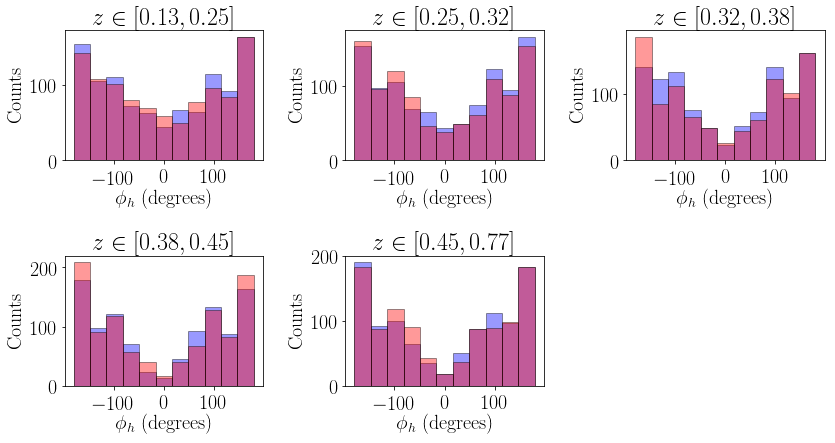

In [8]:
axis = 'z'    
n_bins = len(bins[axis])
n_cols = 3
n_rows = 1 + np.ceil(n_bins/n_cols)

print('Using %d rows.' % n_rows)
fig = plt.figure(figsize=(4*n_cols, 3*n_rows))

for i in range(n_bins-1):
    pos = np.where((nom_data[axis].values > bins[axis][i]) & (nom_data[axis].values < bins[axis][i+1]) & (nom_data['helicity'].values > 0))
    neg = np.where((nom_data[axis].values > bins[axis][i]) & (nom_data[axis].values < bins[axis][i+1]) & (nom_data['helicity'].values < 0))

    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.hist(nom_data.iloc[pos]['phi_h'], 
            color='blue', 
            bins=phi_bins, 
            **filled_histo);
    ax.hist(nom_data.iloc[neg]['phi_h'], 
            color='red', 
            bins=phi_bins, 
            **filled_histo);
    
    ax.set_xlabel('$\phi_h$ (degrees)')
    ax.set_ylabel('Counts')
    
    bin_string = '$%s \in [%.2f, %.2f]$' % (axis, bins[axis][i], bins[axis][i+1])
    ax.set_title(bin_string)
    
fig.tight_layout()
fig.savefig('../image/z-phi-counts.pdf', bbox_inches='tight')

In [9]:
from matplotlib.colors import LogNorm

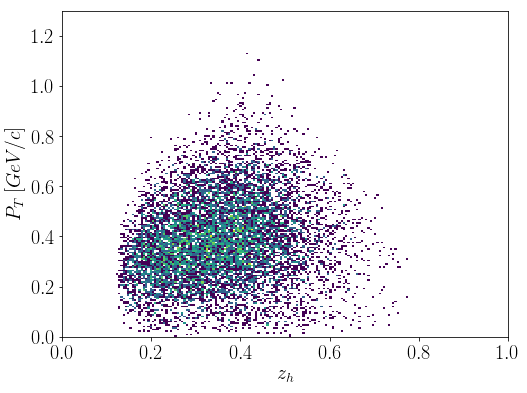

In [10]:
hbins = (np.linspace(0, 1, 200), 
        np.linspace(0, 1.3, 200))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(nom_data['z'], 
          nom_data['pt'], 
         bins=hbins,
         norm=LogNorm());
ax.set_xlabel('$z_h$')
ax.set_ylabel('$P_{T} \; [GeV/c]$')
fig.savefig('../image/z-pt.pdf', bbox_inches='tight')

In [11]:
filt = {'missing_mass':[0.0, 5.0]}
nom_filter = utils.build_filter(data, filt)
nom_data = utils.build_dataframe(data, nom_filter)

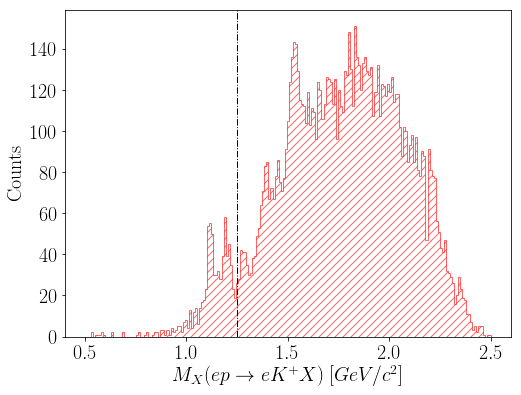

In [12]:
mx_bins = np.linspace(0.5, 2.5, 200)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.hist(nom_data['missing_mass'], color='red', hatch='///', bins=mx_bins, **basic_histo);
#ax.legend(frameon=False)
ax.set_xlabel('$M_X (ep \\rightarrow eK^+X) \; [GeV/c^2]$')
ax.set_ylabel('Counts')
ax.axvline(1.25, color='k', linewidth=1, linestyle='-.')
fig.savefig('../image/mx.pdf', bbox_inches='tight')

In [13]:
nom_filter = utils.build_filter(data)
nom_data = utils.build_dataframe(data, nom_filter)

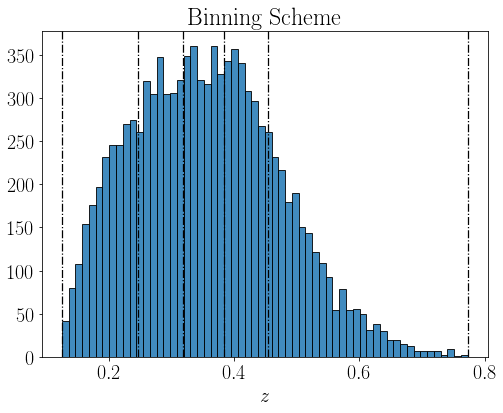

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(nom_data['z'], bins=60, alpha=0.85, edgecolor='k');
ax.set_title('Binning Scheme')
ax.set_xlabel('$z$')

for bin_edge in bins['z']:
    ax.axvline(bin_edge, linestyle='-.', 
                    color='black', linewidth=1.25)

plt.savefig('../image/binning_z.pdf', bbox_inches='tight')

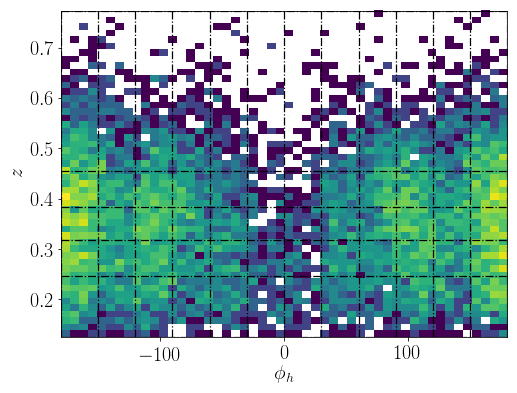

In [15]:
plt.figure(figsize=(8,6))
plt.hist2d(nom_data['phi_h'], nom_data['z'], 
           bins=50, norm=LogNorm());

for bin_edge in bins['z']:
    plt.axhline(bin_edge, linestyle='-.', 
                    color='black', linewidth=1.25)

for bin_edge in np.linspace(-180, 180, 13):
    plt.axvline(bin_edge, linestyle='-.', 
                    color='black', linewidth=1.25)  
    
plt.xlabel('$\phi_h$')
plt.ylabel('$z$')
plt.savefig('../image/binning_z_phi.pdf', bbox_inches='tight')

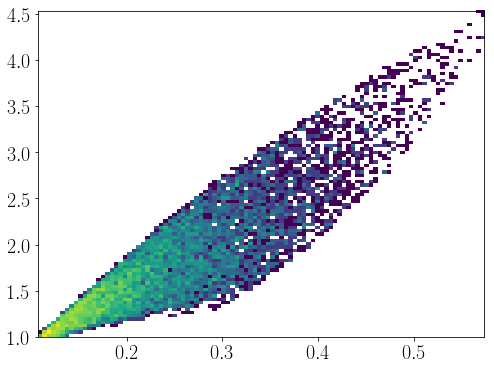

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(nom_data['x'], nom_data['q2'], 
          bins=100, norm=LogNorm());

Text(0,0.5,'$P_T \\; (GeV/c)$')

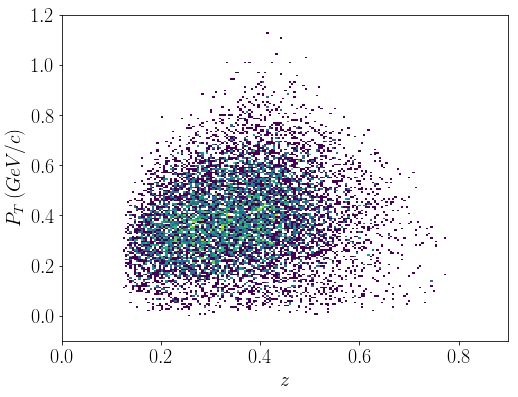

In [17]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(
    nom_data['z'], 
    nom_data['pt'], 
    bins = [np.linspace(0, 0.9, 200), np.linspace(-0.1, 1.2, 200)], 
    norm = LogNorm()
);
ax.set_xlabel('$z$')
ax.set_ylabel('$P_T \; (GeV/c)$')

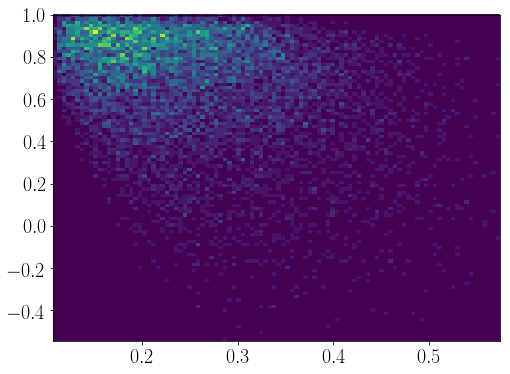

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(nom_data['x'], nom_data['dist_ecw'], 
          bins=100);

In [19]:
var_corrs = nom_data.corr()[['x', 'q2', 'z', 'pt']]

In [20]:
def inverse_d_transform(d, mini, maxi):
    return (d * (maxi-mini) + (maxi+mini)) / 2.0

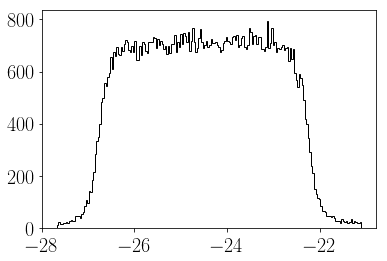

In [21]:
plt.hist(
    inverse_d_transform(data['dist_vz'], -27, -21.85),
        histtype='step', color='black', bins=200
);

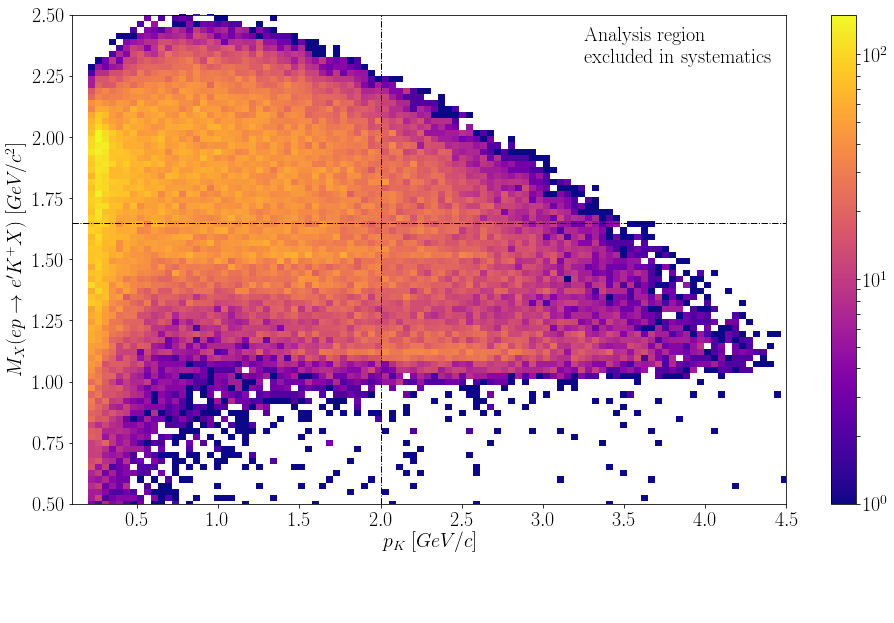

In [22]:
plt.figure( figsize=(16,9) )
plt.hist2d(
    data['p_mes'],
    data['missing_mass'],
    bins = 100,
    norm = LogNorm(),
    cmap = 'plasma'
);

plt.colorbar()
plt.xlim([0.1, 4.5])
plt.ylim([0.5, 2.5])

plt.axhline(1.65, linestyle='-.', linewidth=1, color='k')
plt.axvline(2.00, linestyle='-.', linewidth=1, color='k')

plt.xlabel('$p_{K} \; [GeV/c]$')
plt.ylabel('$M_X (ep \\rightarrow e\'K^+X) \; [GeV/c^2]$')

plt.text(3.25, 2.3, 'Analysis region \n excluded in systematics')
plt.savefig('../image/p_missing_mass.pdf', bbox_inches='tight')

In [23]:
left_data = data.query('missing_mass < 1.65')
right_data = data.query('missing_mass > 1.65')

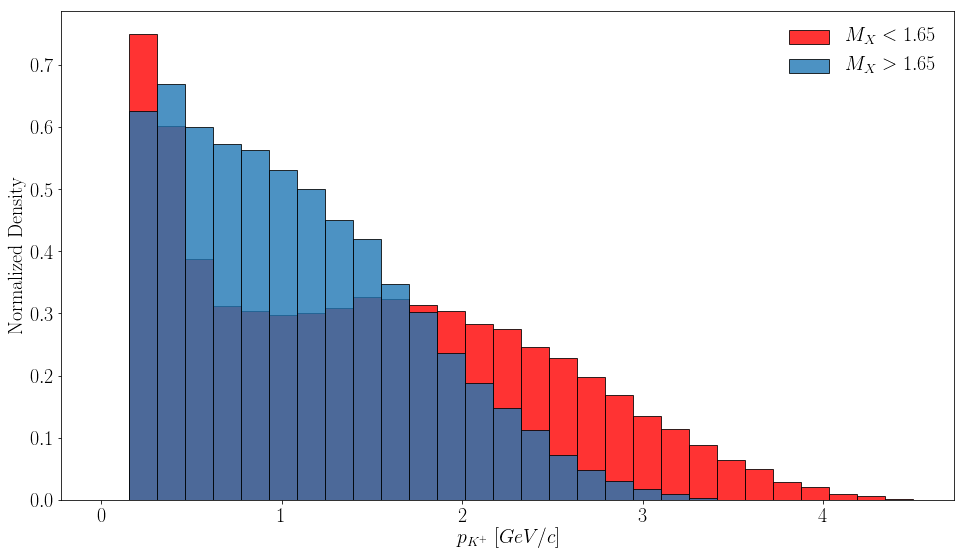

In [24]:
plt.figure( figsize = (16,9) )
plt.hist(
    left_data['p_mes'], 
    bins = np.linspace(0, 4.5, 30),
    alpha = 0.8,
    density = True,
    label = '$M_X < 1.65$',
    edgecolor = 'k',
    color = 'r'
);

plt.hist(
    right_data['p_mes'], 
    bins = np.linspace(0, 4.5, 30),
    alpha = 0.8,
    density = True,
    label = '$M_X > 1.65$',
    edgecolor = 'k'
);

plt.legend(frameon = False)
plt.xlabel('$p_{K^+} \; [GeV/c]$')
plt.ylabel('Normalized Density')
plt.savefig('../image/p_with_missing_mass_cuts.pdf', bbox_inches = 'tight')

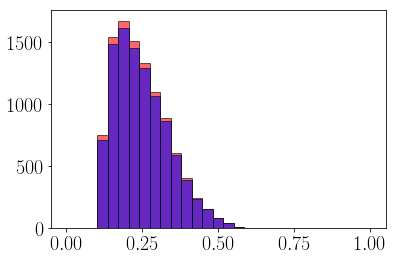

In [25]:
plt.hist(
    nom_data['x'],
    bins = np.linspace(0,1,30), 
    edgecolor = 'k',
    color = 'red',
    alpha = 0.6
);
plt.hist(
    nom_data.query('p_mes > 0.5')['x'],
    bins = np.linspace(0,1,30), 
    edgecolor = 'k',
    color = 'blue',
    alpha = 0.6
);

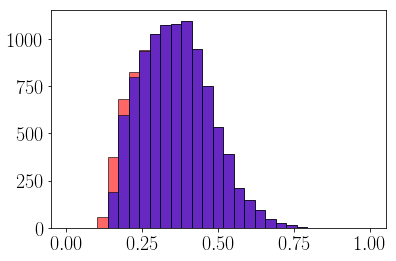

In [29]:
plt.hist(
    nom_data['z'],
    bins = np.linspace(0,1,30), 
    edgecolor = 'k',
    color = 'red',
    alpha = 0.6
);
plt.hist(
    nom_data.query('p_mes > 0.5')['z'],
    bins = np.linspace(0,1,30), 
    edgecolor = 'k',
    color = 'blue',
    alpha = 0.6
);

In [30]:
nom_data.head()

,helicity,missing_mass,x,q2,z,pt,phi_h,p_mes,dvz,alpha,dist_ecsf,dist_ec_edep,dist_vz,dist_cc_theta,dist_dcr1,dist_dcr3,dist_ecu,dist_ecv,dist_ecw,dist_cc
7,-1,1.283756,0.428544,2.408368,0.607660,0.202439,-7.192977,1.751583,0.048828,0.768567,-0.212511,-0.313762,0.479476,-0.067434,-0.755561,-0.782944,-0.449581,0.845762,0.572453,-0.823863
31,1,2.020995,0.314276,2.687051,0.188370,0.210983,-48.189114,0.702068,0.756851,0.566434,-0.321991,-0.732284,-0.855667,0.539571,0.415896,0.258443,0.521107,0.155962,0.455103,-0.194945
36,1,1.282312,0.263300,1.590231,0.551617,0.666492,78.013474,1.705348,1.571678,0.568989,0.045137,-0.241792,0.528179,-0.048783,-0.624804,-0.823931,-0.806473,0.925304,0.790636,-0.885286
38,1,2.009952,0.218705,1.765029,0.320539,0.391815,131.722336,1.287099,-1.318382,0.805379,-0.041787,-0.697016,0.498836,0.111599,-0.762810,-0.945504,-0.324875,0.934304,0.379239,-0.966672
46,1,1.417408,0.239102,1.530606,0.308463,0.579703,108.302612,0.929274,1.419090,0.713547,0.317173,-0.227940,0.606625,0.369021,-0.708252,-0.857237,-0.771085,0.766626,0.920625,-0.899059
